In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import fashion_mnist as fmnist
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, ReLU, BatchNormalization


<h3>Loading the train test splits for fashion_mnist</h3>

In [2]:
(train_X, train_y), (test_X, test_y) = fmnist.load_data()
print(np.shape(train_X))

(60000, 28, 28)


<h3>Preprocessing data</h3>

In [3]:
def normalize(image):
    
    image = tf.cast(image, dtype=float)/255
    # image = tf.reshape(image, [-1,])

    return image

def one_hot_matrix(labels, depth = 10):
    
    one_hot = tf.reshape(tf.one_hot(labels, depth, axis = 0), [-1,])
    
    return one_hot

train_X = tf.data.Dataset.from_tensor_slices(train_X)
train_y = tf.data.Dataset.from_tensor_slices(train_y)

test_X = tf.data.Dataset.from_tensor_slices(test_X)
test_y = tf.data.Dataset.from_tensor_slices(test_y)

new_train_X = train_X.map(normalize)
new_test_X = test_X.map(normalize)

new_train_y = train_y.map(one_hot_matrix)
new_test_y = test_y.map(one_hot_matrix)

train_datset = tf.data.Dataset.zip((new_train_X, new_train_y)).batch(64).prefetch(6)
test_datset = tf.data.Dataset.zip((new_test_X, new_test_y)).batch(64).prefetch(6)


<h3>Defining the Model</h3>

In [4]:
def Classifier_model(input_shape):

    input_img = tf.keras.Input(shape = input_shape)

    Z1 = Conv2D(64, kernel_size = (2,2), strides = (1,1), use_bias = True)(input_img)

    A1 = ReLU()(Z1)

    B1 = BatchNormalization(axis = 3, trainable = True)(A1)

    P1 = MaxPool2D(pool_size= (2,2), strides = (2,2))(B1)

    Z2 = Conv2D(32, kernel_size = (2,2), strides = (1,1), use_bias= True)(P1)

    A2 = ReLU()(Z2)

    B2 = BatchNormalization(axis = 3, trainable = True)(A2)

    P2 = MaxPool2D(pool_size= (2,2), strides = (2,2))(B2)

    F = Flatten()(P2)

    outputs = Dense(units = 10, activation = 'softmax')(F)

    model = tf.keras.Model(inputs = input_img, outputs = outputs)

    return model


<h3>Creating the Model Object</h3>

In [5]:
Model = Classifier_model((28,28,1))
Model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
Model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 27, 27, 64)        320       
                                                                 
 re_lu (ReLU)                (None, 27, 27, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        8224  

<h3>Training the Model</h3>

In [6]:
device_name = tf.test.gpu_device_name()
print(device_name)

with tf.device('/device:GPU:0'):
    history = Model.fit(train_datset, epochs = 20, validation_data = test_datset)


/device:GPU:0
Epoch 1/20
938/938 [==============================] - 7s 5ms/step - loss: 0.4212 - accuracy: 0.8509 - val_loss: 0.3584 - val_accuracy: 0.8776
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.3070 - accuracy: 0.8906 - val_loss: 0.3409 - val_accuracy: 0.8783
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2739 - accuracy: 0.9024 - val_loss: 0.3420 - val_accuracy: 0.8817
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2522 - accuracy: 0.9091 - val_loss: 0.3148 - val_accuracy: 0.8895
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2367 - accuracy: 0.9156 - val_loss: 0.3236 - val_accuracy: 0.8855
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2248 - accuracy: 0.9196 - val_loss: 0.3308 - val_accuracy: 0.8817
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2150 - accuracy: 0.9228 - val_loss: 0.3405 - val_accuracy:

<h3>Visualizing Model Loss and Model Accuracy over training</h3>

<Figure size 432x288 with 0 Axes>

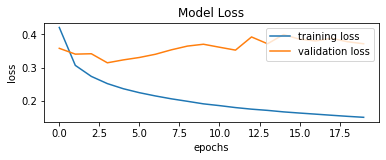

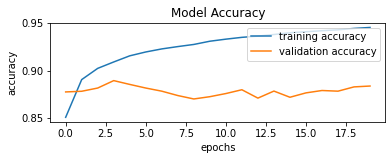

<Figure size 432x288 with 0 Axes>

In [7]:
import pandas as pd

history = pd.DataFrame(history.history)

history.rename(columns = {'loss':'training loss', 'val_loss':'validation loss', 'accuracy':'training accuracy', 'val_accuracy': 'validation accuracy'}, inplace=True)

plt.subplot(2,1,1)
plt.plot(history['training loss'], label = 'training loss')
plt.plot(history['validation loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc = 'upper right')
plt.figure(figsize=(6,4))


plt.subplot(2,1,2)
plt.plot(history['training accuracy'], label = 'training accuracy')
plt.plot(history['validation accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc = 'upper right')
plt.figure(figsize=(6,4))

<h3>Saving the Model</h3>

In [14]:
Model.save('Model~v1.0')

INFO:tensorflow:Assets written to: Model~v1.0\assets


INFO:tensorflow:Assets written to: Model~v1.0\assets


<h3>Notes for the first v1.0 of the Model</h3>

The Model performed very well on the training set however, there was a gap between the training loss and the validation loss. This means the model has high variance and may be overfitting the training set. Next, I will implement dropout regularization to regularize the Model.